## Precision-Recall-Curves

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_wine
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize

from sklearn.metrics import (
    precision_recall_curve,
    average_precision_score,
)

from yellowbrick.classifier import PrecisionRecallCurve

## Load data (multiclass)

In [3]:
# load data
data = load_wine()

data = pd.concat([
    pd.DataFrame(data.data, columns=data.feature_names),
    pd.DataFrame(data.target, columns=['target']),
    ], axis=1)

data.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [4]:
# target distribution:
# multiclass and (fairly) balanced

data.target.value_counts(normalize=True)

1    0.398876
0    0.331461
2    0.269663
Name: target, dtype: float64

In [5]:
# separate dataset into train and test

X_train, X_test, y_train, y_test = train_test_split(
    data.drop(labels=['target'], axis=1),  # drop the target
    data['target'],  # just the target
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((124, 13), (54, 13))

## Train ML models

### Random Forests

In [18]:
# set up the model
rf = RandomForestClassifier(n_estimators=100, random_state=39, max_depth=2, n_jobs=4)

# train the model
rf.fit(X_train, y_train)

# produce the predictions (as probabilities)
y_train_rf = rf.predict_proba(X_train)
y_test_rf = rf.predict_proba(X_test)

# note that the predictions are an array of 3 columns
# first column: the probability of an observation of being of class 0
# second column: the probability of an observation of being of class 1
# third column: the probability of an observation of being of class 2

y_test_rf

array([[0.87678331, 0.09220144, 0.03101525],
       [0.05496004, 0.21000983, 0.73503013],
       [0.40112495, 0.5306512 , 0.06822384],
       [0.81696901, 0.14255125, 0.04047974],
       [0.18723982, 0.676161  , 0.13659917],
       [0.34637493, 0.5200715 , 0.13355357],
       [0.82318308, 0.11213665, 0.06468027],
       [0.02569354, 0.18425291, 0.79005355],
       [0.03260058, 0.9301306 , 0.03726882],
       [0.02886377, 0.88134961, 0.08978662],
       [0.2530761 , 0.18737308, 0.55955082],
       [0.0337794 , 0.10941056, 0.85681003],
       [0.90041976, 0.07780869, 0.02177155],
       [0.40112495, 0.5306512 , 0.06822384],
       [0.07473266, 0.08303493, 0.84223241],
       [0.09878787, 0.87345012, 0.02776201],
       [0.79208374, 0.13753879, 0.07037746],
       [0.89468206, 0.08387426, 0.02144368],
       [0.05767706, 0.42091923, 0.52140371],
       [0.86664303, 0.09456514, 0.03879183],
       [0.5205471 , 0.36796142, 0.11149148],
       [0.75273066, 0.16488523, 0.08238411],
       [0.

In [19]:
# The final prediction is that of the biggest probabiity
rf.predict(X_test)

array([0, 2, 1, 0, 1, 1, 0, 2, 1, 1, 2, 2, 0, 1, 2, 1, 0, 0, 2, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 2, 0, 0, 1, 0, 0, 0, 2, 1, 1, 2, 0, 0, 1, 1,
       1, 0, 2, 1, 2, 0, 2, 2, 0, 2])

### Logistic Regression

In [20]:
# set up the model
logit = LogisticRegression(random_state=0,  max_iter=1000)

# train
logit.fit(X_train, y_train)

# obtain the probabilities
y_train_logit = logit.predict_proba(X_train)
y_test_logit = logit.predict_proba(X_test)

C:\Users\Sole\Documents\Repositories\envs\imbalanced\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Precision-Recall Curve

### Sklearn

In [21]:
# with label_binarize we transform the target vector
# into a multi-label matrix

y_test = label_binarize(y_test, classes=[0, 1, 2])

y_test

array([[1, 0, 0],
       [0, 0, 1],
       [0, 1, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 0, 1],
       [1, 0, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 1, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 1, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 0, 1],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 1, 0],
       [0, 0, 1],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 0, 1],
       [1, 0, 0],
       [0, 0, 1],
       [0, 0, 1],
       [1, 0, 0],
       [0, 0, 1]])

In [26]:
# let's break it down bit by bit
# let's determine the values for the PR curve for class 2

p, r, thresholds = precision_recall_curve(y_test[:, 2], y_test_rf[:, 2])

# precision values
p

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [27]:
# recall values
r

array([1.        , 0.92307692, 0.84615385, 0.76923077, 0.69230769,
       0.61538462, 0.53846154, 0.46153846, 0.38461538, 0.30769231,
       0.23076923, 0.15384615, 0.07692308, 0.        ])

In [28]:
# threhsolds examined
thresholds

array([0.55579163, 0.55955082, 0.7341112 , 0.73503013, 0.74361282,
       0.79005355, 0.79577742, 0.80375363, 0.84223241, 0.85497682,
       0.85681003, 0.88138212, 0.88152885])

Go ahead and change the value of the class and see how these values change.

In [29]:
average_precision_score(y_test[:, 2], y_test_rf[:, 2])

0.9999999999999998

In [10]:
# determine the Precision, recall and average precision
# at various thresholds of probability
# in a 1 vs all fashion

precision = dict()
recall = dict()
average_precision = dict()

# for each class
for i in range(n_classes):
    
    # determine precision and recall at various thresholds
    # in a 1 vs all fashion
    precision[i], recall[i], _ = precision_recall_curve(Y_test[:, i],
                                                        y_score[:, i])
    
    average_precision[i] = average_precision_score(Y_test[:, i], y_score[:, i])

array([0.   , 0.025, 0.05 , 0.075, 0.1  , 0.125, 0.15 , 0.175, 0.2  ,
       0.225, 0.25 , 0.275, 0.3  , 0.325, 0.35 , 0.375, 0.4  , 0.425,
       0.45 , 0.475, 0.5  , 0.525, 0.55 , 0.575, 0.6  , 0.625, 0.65 ,
       0.675, 0.7  , 0.725, 0.75 , 0.775, 0.8  , 0.825, 0.85 , 0.875,
       0.9  , 0.925, 0.95 , 0.975])

In [30]:
y_test.ravel()

array([1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 1])

### Yellobrick

https://www.scikit-yb.org/en/latest/api/classifier/prcurve.html

C:\Users\Sole\Documents\Repositories\envs\imbalanced\lib\site-packages\sklearn\base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


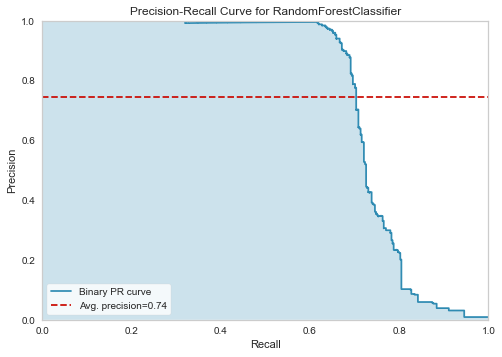

<AxesSubplot:title={'center':'Precision-Recall Curve for RandomForestClassifier'}, xlabel='Recall', ylabel='Precision'>

In [10]:
visualizer = PrecisionRecallCurve(rf, classes=[0, 1])

visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()                       # Finalize and show the figure

C:\Users\Sole\Documents\Repositories\envs\imbalanced\lib\site-packages\sklearn\base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


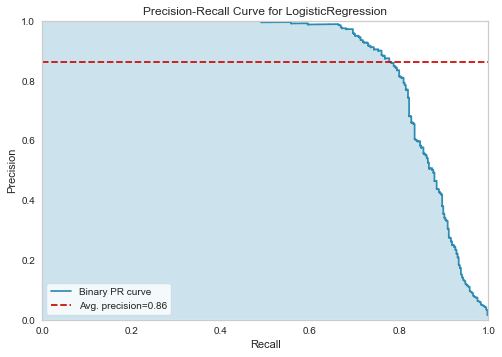

<AxesSubplot:title={'center':'Precision-Recall Curve for LogisticRegression'}, xlabel='Recall', ylabel='Precision'>

In [11]:
visualizer = PrecisionRecallCurve(logit, classes=[0, 1])

visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()                       # Finalize and show the figure

## Additional Reading

https://towardsdatascience.com/on-roc-and-precision-recall-curves-c23e9b63820c